In [110]:
pip install seaborn --upgrade

Note: you may need to restart the kernel to use updated packages.


In [129]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 


# Load the dataset
file_path = 'STTHK3013_pilot_performance_simulation_data.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')
print(f"\ndata shape: {data.shape}")



data shape: (979, 10)


C:\Users\Irdina Balqis\AppData\Local\Temp\ipykernel_14716\1202976746.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_distribution.index, y=target_distribution.values, palette="viridis")


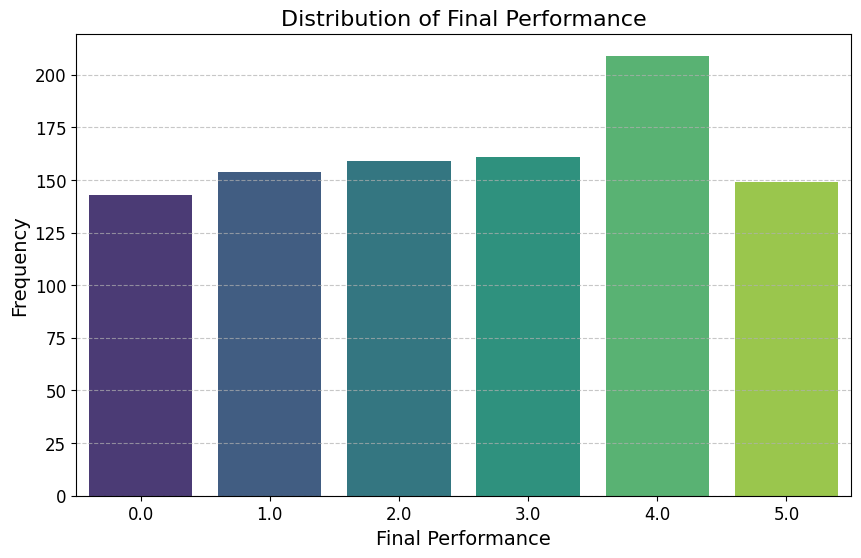

Final Performance Distribution:
 final_performance
0.0    143
1.0    154
2.0    159
3.0    161
4.0    209
5.0    149
Name: count, dtype: int64

data shape: (979, 10)


In [130]:
# Analyze the distribution of the target variable 'final_performance'
target_distribution = data['final_performance'].value_counts().sort_index()

# Plot the distribution of 'final_performance'
plt.figure(figsize=(10, 6))
sns.barplot(x=target_distribution.index, y=target_distribution.values, palette="viridis")
plt.title('Distribution of Final Performance', fontsize=16)
plt.xlabel('Final Performance', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print the distribution summary
print("Final Performance Distribution:\n", target_distribution)

# Display the shape of the cleaned data (number of rows before and after)
print(f"\ndata shape: {data.shape}")


In [113]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print ("\nMissing Values Summary:\n", missing_values.sum(), "missing values in the dataset")
print("\nMissing Values per Feature:\n", missing_values[missing_values > 0])


Missing Values Summary:
 52 missing values in the dataset

Missing Values per Feature:
 heart_rate                 7
sleep_quality              9
mission_complexity         7
experience_level           7
environmental_stressors    1
cognitive_level            6
fatigue_level              4
stress_level               3
time_reaction              4
final_performance          4
dtype: int64


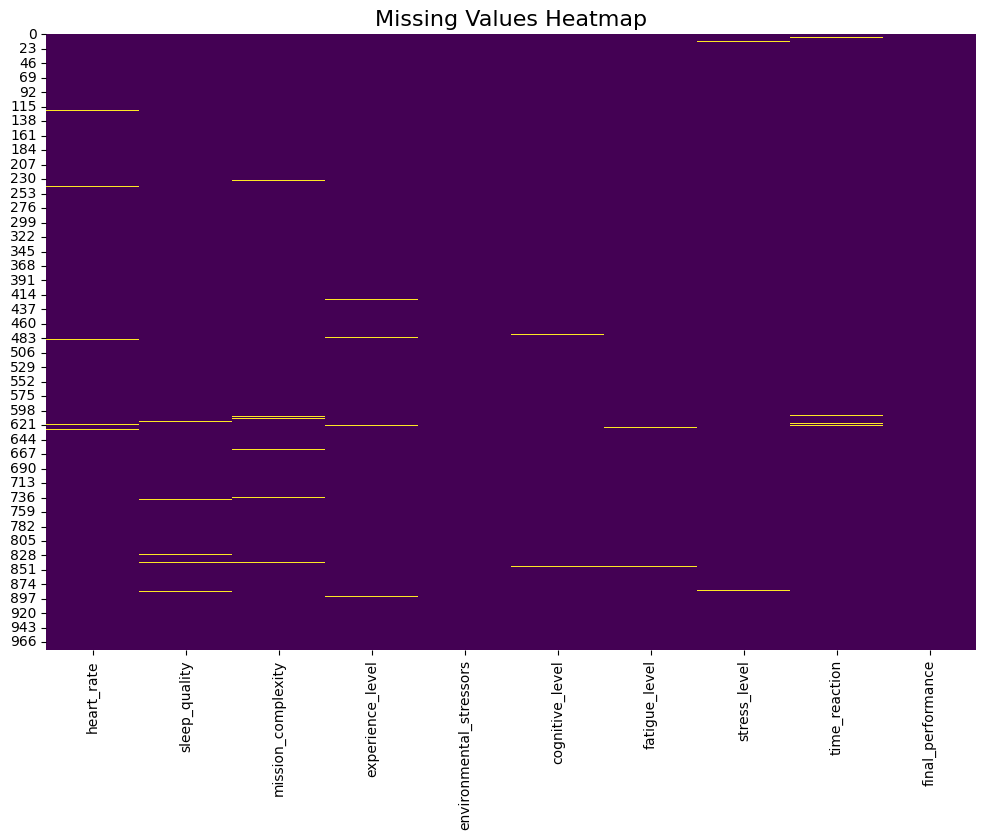

In [114]:
# Visualize missing values as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap', fontsize=16)
plt.show()

In [132]:
# Drop rows where 'final_performance' is missing
data.dropna(subset=['final_performance'], inplace=True)

# Impute continuous columns with mean
continuous_columns = [
    'heart_rate', 'sleep_quality', 'mission_complexity', 'experience_level', 
    'environmental_stressors', 'cognitive_level', 'fatigue_level', 'stress_level', 'time_reaction'
]

for col in continuous_columns:
    mean_value = data[col].mean()
    data[col].fillna(mean_value, inplace=True)

# Verify that missing values are handled
# print("Missing Values After Imputation:")
# print(data.isnull().sum())

# Display the first few rows of the dataset after imputation
print(data.head())

print(f"\ndata shape after minus final perfromance: {data.shape}") 

   heart_rate  sleep_quality  mission_complexity  experience_level  \
0   73.069179       5.209936            3.542490          2.950158   
1   85.503196       4.250244            3.911206          8.444680   
2   68.889989       8.526936            4.163752          7.035220   
3   82.963400       5.055927            1.569873          9.049509   
4   74.983783       6.731979            9.873655          1.514617   

   environmental_stressors  cognitive_level  fatigue_level  stress_level  \
0                 2.816011         4.628891       2.643523      5.636319   
1                 3.505539         3.022155       3.362025      5.827296   
2                 1.991987         4.142527       3.054340      3.102756   
3                 2.230838         4.498199       3.762958      5.146209   
4                 3.510676         7.043190       1.481578      3.180736   

   time_reaction  final_performance  
0     379.196822                2.0  
1     212.188488                4.0  
2     34

C:\Users\Irdina Balqis\AppData\Local\Temp\ipykernel_14716\839593239.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mean_value, inplace=True)


In [133]:
# Check the remaining missing values in the dataset
missing_values_after_drop = data.isnull().sum()
print("\nMissing Values After Dropping Rows:\n", missing_values_after_drop.sum(), "missing values left in the dataset")
print("\nMissing Values Per Feature After Drop:\n", missing_values_after_drop[missing_values_after_drop > 0])


Missing Values After Dropping Rows:
 0 missing values left in the dataset

Missing Values Per Feature After Drop:
 Series([], dtype: int64)


   heart_rate  sleep_quality  mission_complexity  experience_level  \
0   73.069179       5.209936            3.542490          2.950158   
1   85.503196       4.250244            3.911206          8.444680   
2   68.889989       8.526936            4.163752          7.035220   
3   82.963400       5.055927            1.569873          9.049509   
4   74.983783       6.731979            9.873655          1.514617   

   environmental_stressors  cognitive_level  fatigue_level  stress_level  \
0                 2.816011         4.628891       2.643523      5.636319   
1                 3.505539         3.022155       3.362025      5.827296   
2                 1.991987         4.142527       3.054340      3.102756   
3                 2.230838         4.498199       3.762958      5.146209   
4                 3.510676         7.043190       1.481578      3.180736   

   time_reaction  final_performance  
0     379.196822                2.0  
1     212.188488                4.0  
2     34

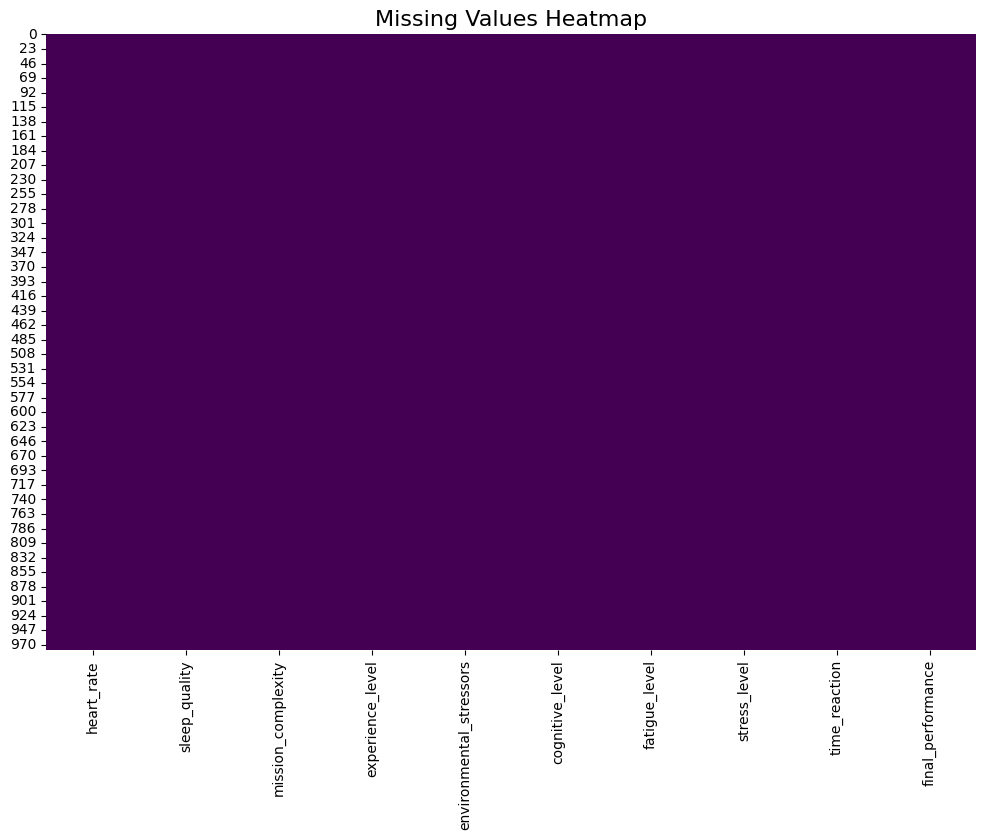


data shape: (975, 10)


<Figure size 1600x2000 with 0 Axes>

In [134]:
# Display the first few rows of the dataset after imputation
print(data.head())

# Visualize missing values as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap', fontsize=16)
plt.show()

# Plot distribution of each variable
columns = data.columns
plt.figure(figsize=(16, 20))

print(f"\ndata shape: {data.shape}") 

C:\Users\Irdina Balqis\AppData\Local\Temp\ipykernel_14716\3023003532.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette="viridis")  # Explicitly set x and data


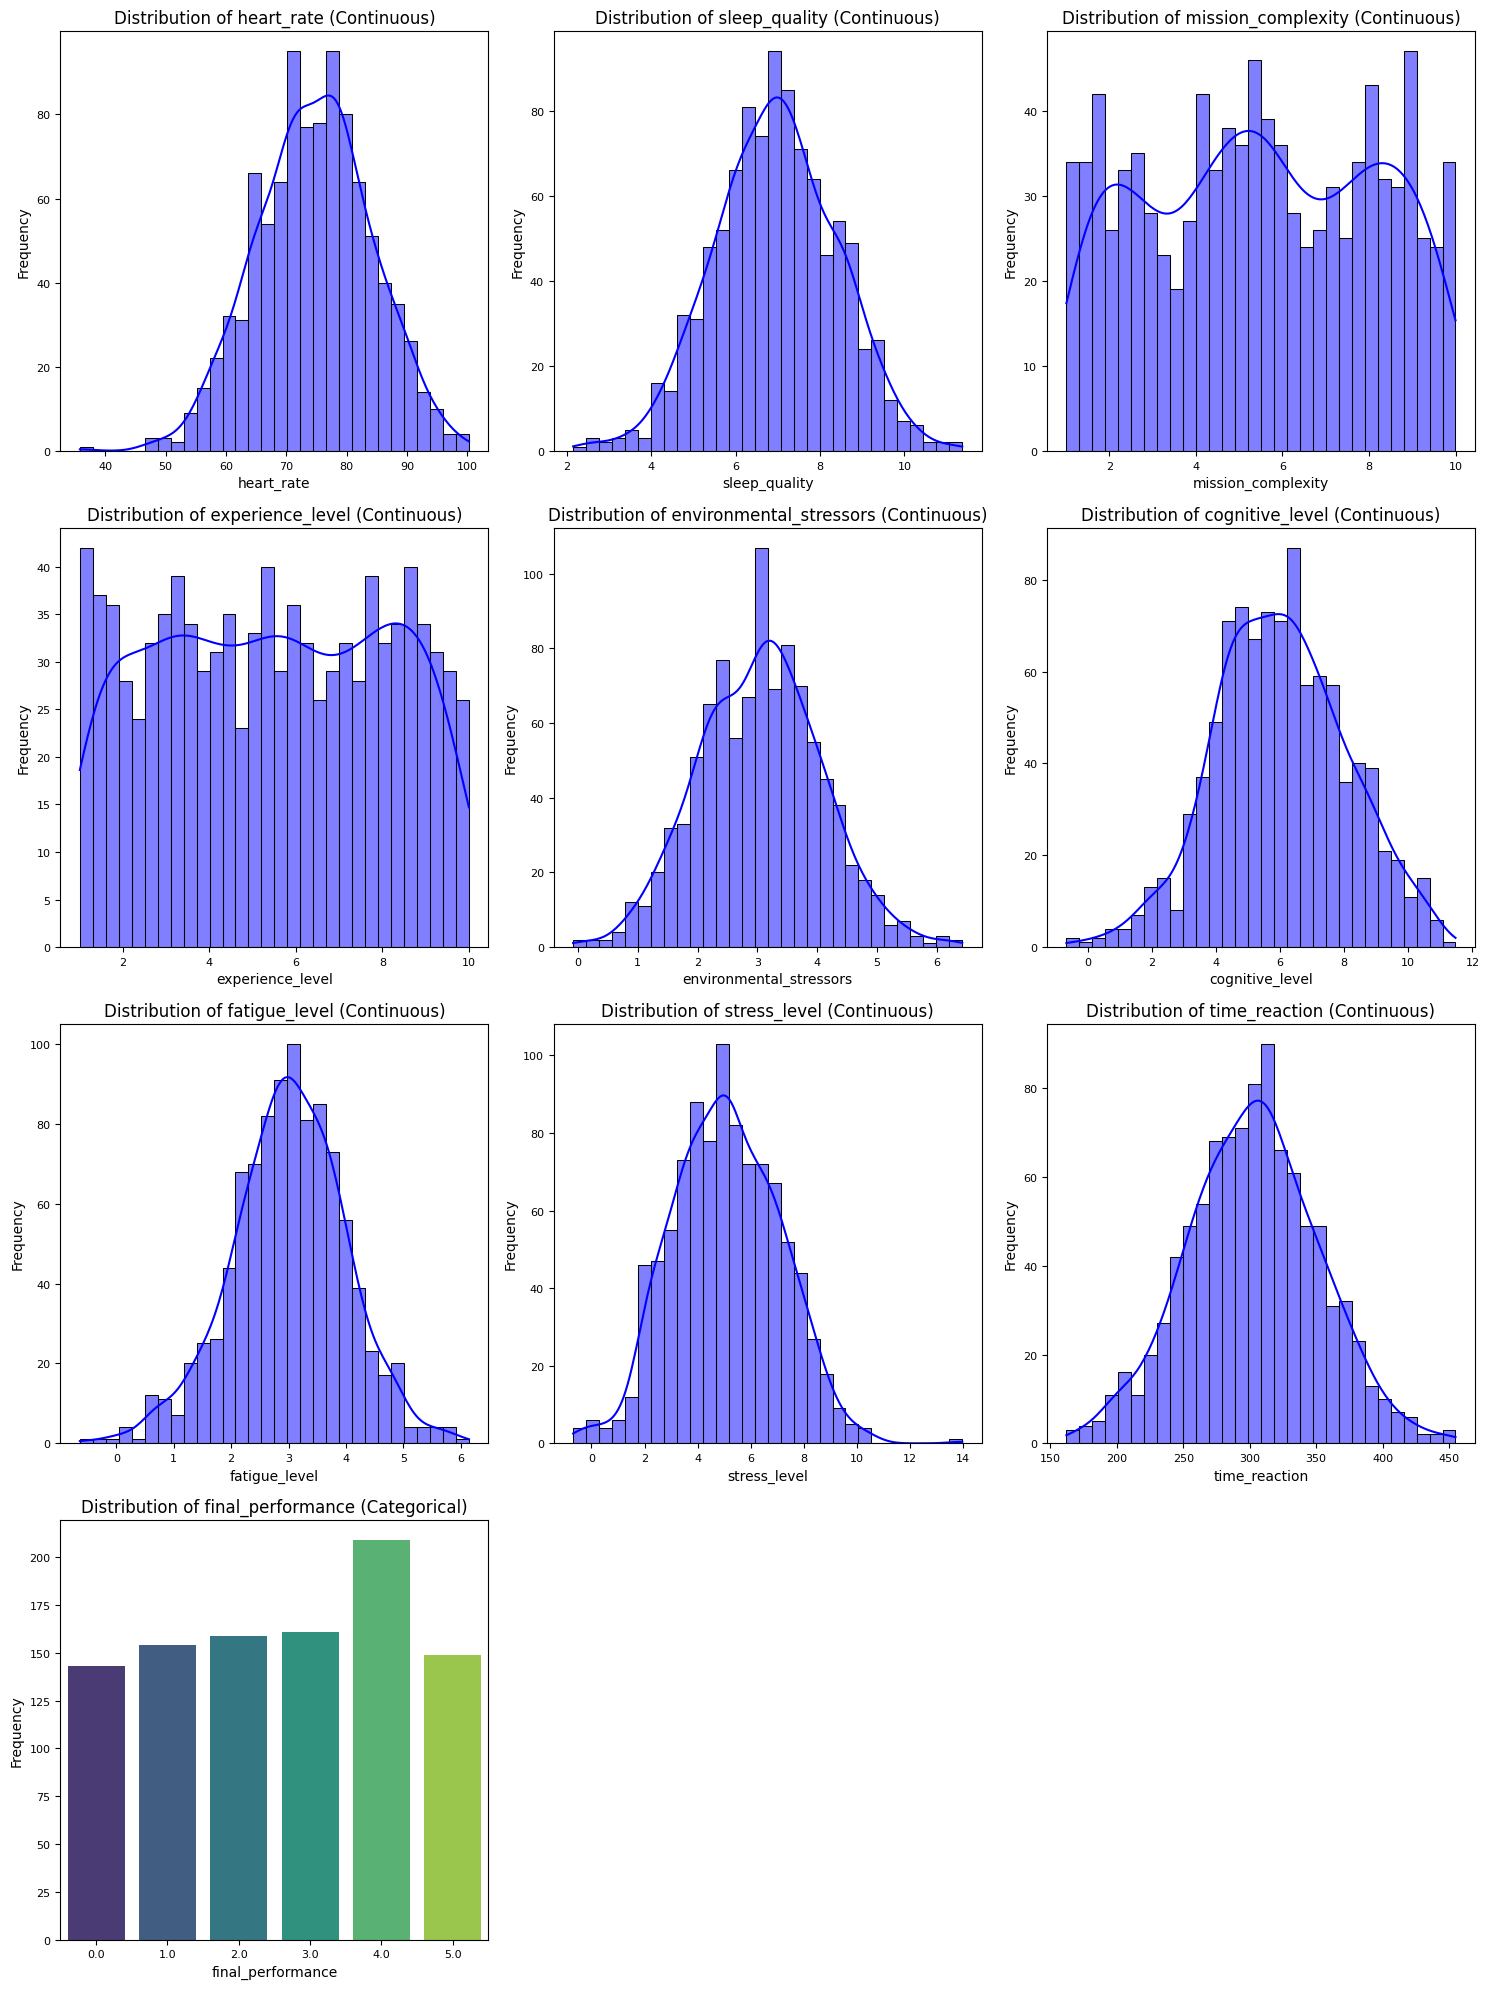


data shape: (975, 10)


In [135]:
# Adjust subplot layout dynamically for better spacing
plt.figure(figsize=(15, len(columns) * 2))  # Adjust figure size based on the number of columns

for i, col in enumerate(columns, 1):
    plt.subplot((len(columns) + 2) // 3, 3, i)  # Arrange plots in a grid
    if data[col].nunique() < 20:  # Discrete/categorical
        sns.countplot(x=col, data=data, palette="viridis")  # Explicitly set x and data
        plt.title(f'Distribution of {col} (Categorical)', fontsize=12)
    else:  # Continuous
        sns.histplot(data[col], kde=True, bins=30, color='blue')
        plt.title(f'Distribution of {col} (Continuous)', fontsize=12)
    
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()
print(f"\ndata shape: {data.shape}") 

Number of outliers in heart_rate: 5

Outliers in heart_rate:
      heart_rate  sleep_quality  mission_complexity  experience_level  \
432   47.547004       7.618125            2.137836          3.761543   
465   46.980884       7.693231            8.014026          1.996688   
549  100.303697       8.602824            5.486904          6.547207   
626   35.775997       8.856197            1.950244          1.860972   
970   47.775459       5.371055            8.945251          3.954810   

     environmental_stressors  cognitive_level  fatigue_level  stress_level  \
432                 2.147427         4.269401       3.774626      4.639729   
465                 2.031987         3.410136       2.858416      2.804713   
549                 4.855119         7.682163       3.920396      2.689008   
626                 4.003313         4.129834       0.932182      6.396167   
970                 2.311350         6.311159       1.601902      5.477116   

     time_reaction  final_performanc

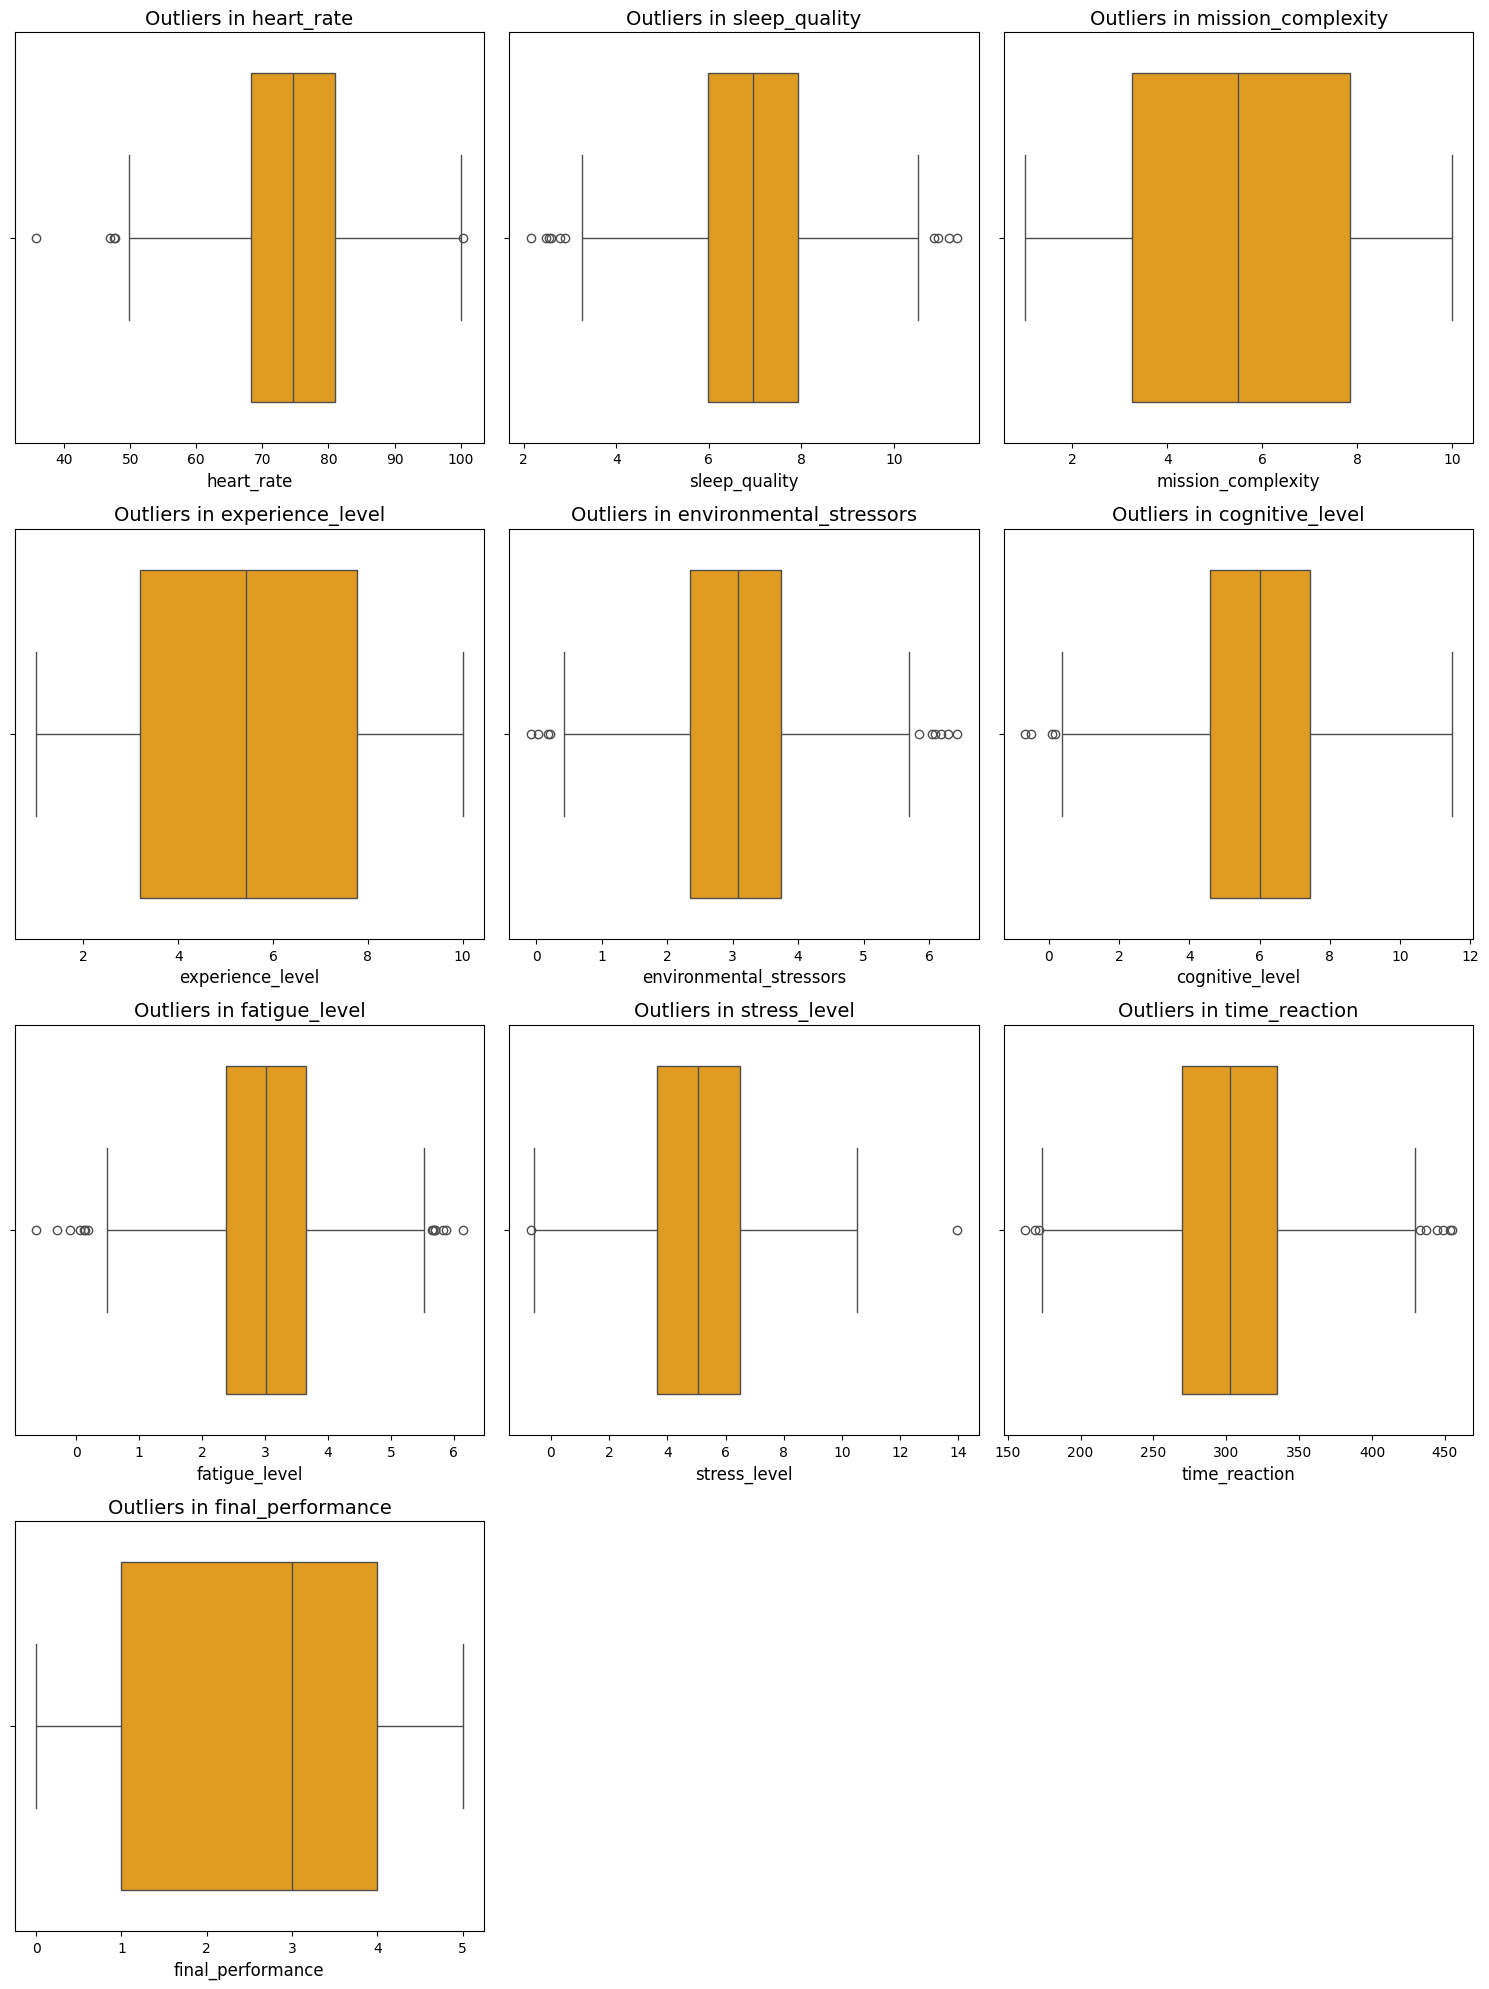


Summary of outliers by column:
heart_rate: 5 outliers
sleep_quality: 10 outliers
mission_complexity: 0 outliers
experience_level: 0 outliers
environmental_stressors: 10 outliers
cognitive_level: 4 outliers
fatigue_level: 14 outliers
stress_level: 2 outliers
time_reaction: 9 outliers
final_performance: 0 outliers

Total number of outliers in all columns: 54

data shape: (975, 10)


In [136]:
# Outlier detection using IQR for numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns

outlier_summary = {}  # Dictionary to store the count of outliers for each column
total_outliers = 0  # Initialize total outliers counter

# Set up the grid for subplots
num_cols = len(numeric_cols)
nrows = (num_cols + 2) // 3  # Number of rows (3 plots per row)
fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))  # Adjust figure size
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Initialize a mask for rows to keep (True for rows to keep)
rows_to_keep = np.ones(len(data), dtype=bool)

for i, col in enumerate(numeric_cols):
    # Calculate Q1, Q3, and IQR
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_summary[col] = outlier_count  # Store count in the dictionary

    # Print the number of outliers in this column
    print(f"Number of outliers in {col}: {outlier_count}")
    
    # Print the outliers for this column
    print(f"\nOutliers in {col}:\n", outliers)

    # Count the number of outliers
    num_outliers = outliers.shape[0]
    total_outliers += num_outliers  # Add to the total count
    print(f"Number of outliers in {col}: {num_outliers}")

    # Update the rows_to_keep mask (keep rows that are not outliers)
    rows_to_keep = rows_to_keep & ~((data[col] < lower_bound) | (data[col] > upper_bound))

    # Plot boxplot in the respective subplot
    sns.boxplot(x=data[col], color='orange', ax=axes[i])
    axes[i].set_title(f'Outliers in {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].tick_params(axis='x', labelsize=10)

# Hide any unused subplots (if there are fewer columns than subplots)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and display all plots on one page
plt.tight_layout()
plt.show()

# Display a summary of outliers
print("\nSummary of outliers by column:")
for col, count in outlier_summary.items():
    print(f"{col}: {count} outliers")

# Print total number of outliers
print(f"\nTotal number of outliers in all columns: {total_outliers}")
print(f"\ndata shape: {data.shape}") 

In [138]:
# Drop rows with outliers based on the mask
data_cleaned = data[rows_to_keep]

# Display the shape of the cleaned data (number of rows before and after)
print(f"\nOriginal data shape: {data.shape}")
print(f"Cleaned data shape: {data_cleaned.shape}")



Original data shape: (975, 10)
Cleaned data shape: (922, 10)


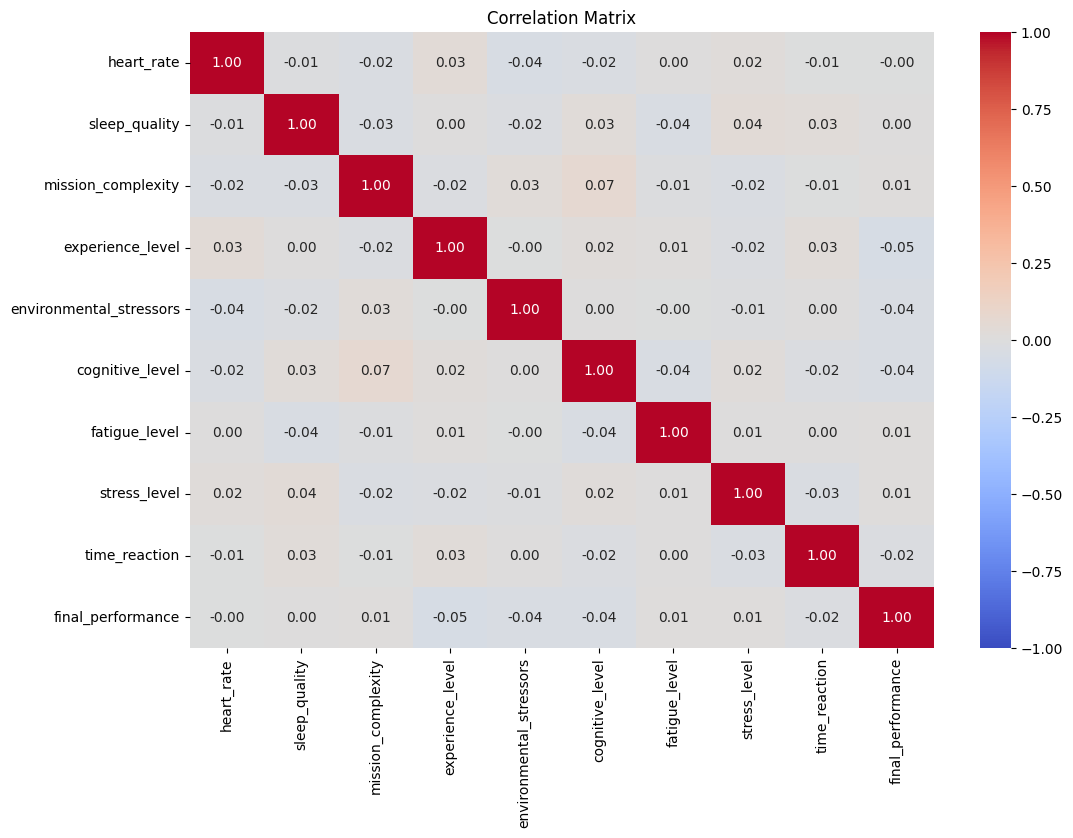

In [121]:
# Compute the correlation matrix
correlation_matrix = data_cleaned.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [140]:
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = data_cleaned.columns
vif_data['VIF'] = [variance_inflation_factor(data_cleaned.values, i) for i in range(data_cleaned.shape[1])]

# Display VIF for each feature
print(vif_data)

print(f"\ndata shape: {data_cleaned.shape}") 

                   feature        VIF
0               heart_rate  40.688481
1            sleep_quality  22.889167
2       mission_complexity   5.489773
3         experience_level   5.282777
4  environmental_stressors   9.890761
5          cognitive_level   9.785448
6            fatigue_level  10.630445
7             stress_level   7.420258
8            time_reaction  31.716215
9        final_performance   3.419238

data shape: (922, 10)


Before we remove the multicollinearity just because of the VIF, we should see the heatmap first.
If the correlation value is low, we should not buand o 

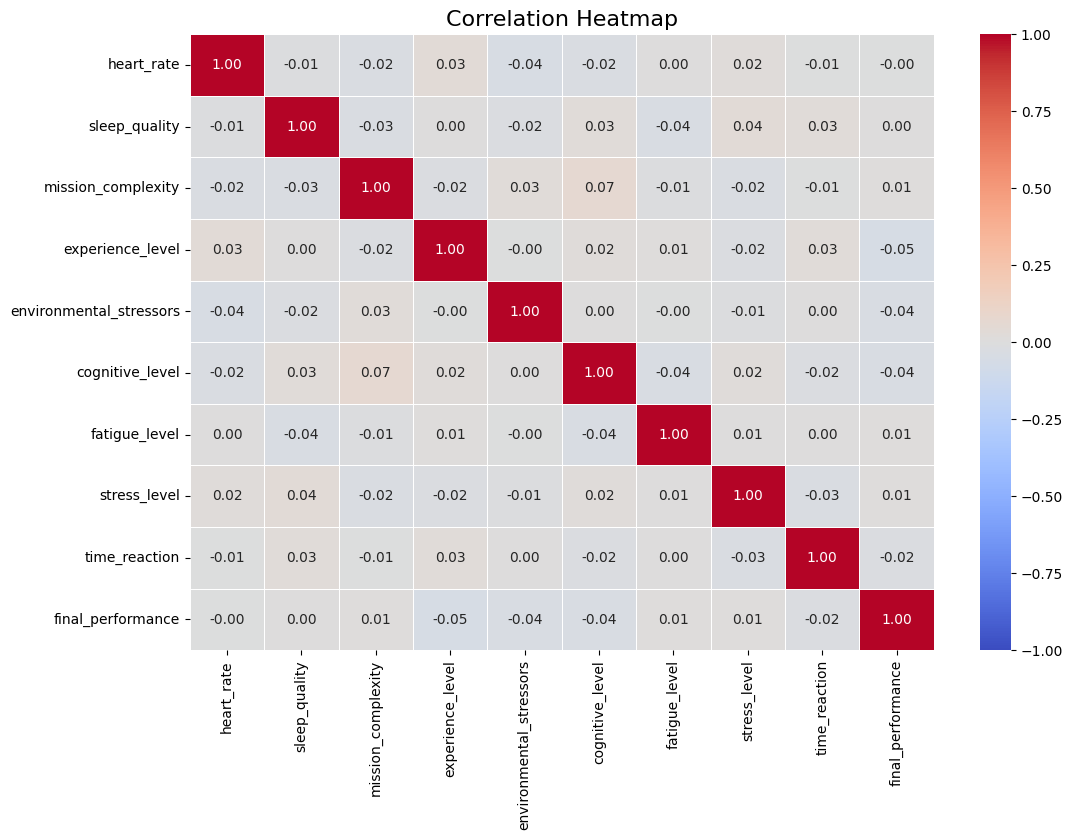


data shape: (922, 10)


In [141]:
# Calculate correlation matrix
corr_matrix = data_cleaned.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

print(f"\ndata shape: {data_cleaned.shape}") 